# import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Import Data

In [6]:
filepath = "data/grocery-inventory_clean_02_25.csv"

# Read Data

In [7]:
df = pd.read_csv(filepath)

# EDA

In [8]:
df.head()

,id,name,quantity,Food_Group,Health
0,78,Garbage Bags,1.0,not food,NaN
1,77,Tortilla Chips,2.0,carbs 🍞,False
2,74,Granulated Sugar,1.0,"carbs 🍞, treat",False
3,73,Brown Sugar,1.0,"carbs 🍞, treat",False
4,72,Festival Mix,1.0,"carbs 🍞, treat",False


In [9]:
# Normalize Text Data
df['Food_Group'] = df['Food_Group'].str.capitalize()

In [10]:
# Remove Unnecessary Characters (emojis)
df['Food_Group'] = df['Food_Group'].str.replace(r'[^\w\s]', '', regex=True)


In [11]:
df.describe()

,id,quantity
count,69.000000,69.000000
mean,39.550725,1.460145
std,22.832856,1.767051
min,1.000000,0.000000
25%,19.000000,1.000000
50%,42.000000,1.000000
75%,59.000000,1.000000
max,78.000000,12.000000


In [12]:
df.head()

,id,name,quantity,Food_Group,Health
0,78,Garbage Bags,1.0,Not food,NaN
1,77,Tortilla Chips,2.0,Carbs,False
2,74,Granulated Sugar,1.0,Carbs treat,False
3,73,Brown Sugar,1.0,Carbs treat,False
4,72,Festival Mix,1.0,Carbs treat,False


In [13]:
df.tail()

,id,name,quantity,Food_Group,Health
64,5,White Rice,0.75,Grain,False
65,4,Milk (Bag of 3),0.75,Dairy,True
66,3,Brown Rice,0.50,Grain,True
67,2,Whole Chicken 🐓,2.00,Poultry,True
68,1,Chicken Egg Rolls,1.00,Meat,False


In [14]:
df.describe(include = "all")

,id,name,quantity,Food_Group,Health
count,69.000000,69,69.000000,69,55
unique,NaN,69,NaN,18,2
top,NaN,Garbage Bags,NaN,Carbs,False
freq,NaN,1,NaN,17,33
mean,39.550725,NaN,1.460145,NaN,NaN
std,22.832856,NaN,1.767051,NaN,NaN
min,1.000000,NaN,0.000000,NaN,NaN
25%,19.000000,NaN,1.000000,NaN,NaN
50%,42.000000,NaN,1.000000,NaN,NaN
75%,59.000000,NaN,1.000000,NaN,NaN


In [15]:
df.dtypes

id              int64
name           object
quantity      float64
Food_Group     object
Health         object
dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          69 non-null     int64  
 1   name        69 non-null     object 
 2   quantity    69 non-null     float64
 3   Food_Group  69 non-null     object 
 4   Health      55 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.8+ KB


In [14]:
# Display cleaned DataFrame
print(df)

    id               name  quantity    Food_Group Health
0   78       Garbage Bags      1.00      Not food    NaN
1   77     Tortilla Chips      2.00        Carbs   False
2   74   Granulated Sugar      1.00  Carbs  treat  False
3   73        Brown Sugar      1.00  Carbs  treat  False
4   72       Festival Mix      1.00  Carbs  treat  False
..  ..                ...       ...           ...    ...
64   5         White Rice      0.75        Grain   False
65   4    Milk (Bag of 3)      0.75        Dairy    True
66   3         Brown Rice      0.50        Grain    True
67   2    Whole Chicken 🐓      2.00      Poultry    True
68   1  Chicken Egg Rolls      1.00         Meat   False

[69 rows x 5 columns]


# Visualization

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127471 (\N{REGIONAL INDICATOR SYMBOL LETTER J}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127474 (\N{REGIONAL INDICATOR SYMBOL LETTER M}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129382 (\N{BROCCOLI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128008 (\N{CAT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127851 (\N{CHOCOLATE BAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda

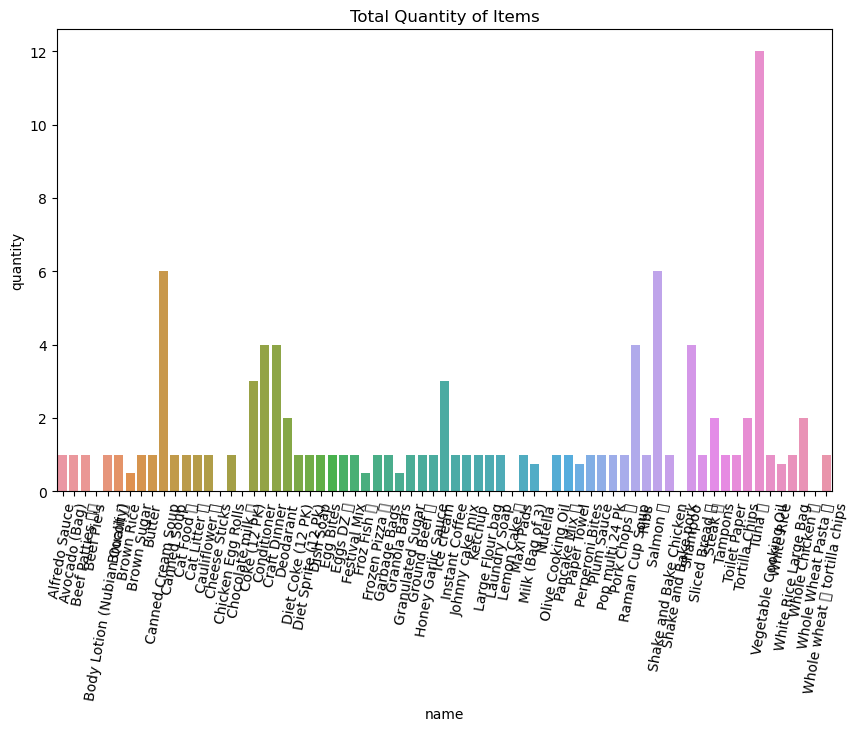

In [15]:
# Aggregate the data by 'name', summing up the 'quantity'
agg_df = df.groupby('name')['quantity'].sum().reset_index()

# Now plot using this aggregated data
plt.figure(figsize=(10, 6))
sns.barplot(x='name', y='quantity', data=agg_df)
plt.title('Total Quantity of Items')
plt.xticks(rotation=80)  # Rotate labels by 45 degrees
plt.show()

***This is a lot of fun***

In [16]:
df.sample(5)

,id,name,quantity,Food_Group,Health
32,44,Shampoo,4.0,Not food,NaN
28,48,Shake and Bake pork,0.0,Carbs,False
18,58,Honey Garlic Sauce,1.0,Condiment,False
36,38,Frozen Pizza 🍕,1.0,Carbs,False
3,73,Brown Sugar,1.0,Carbs treat,False


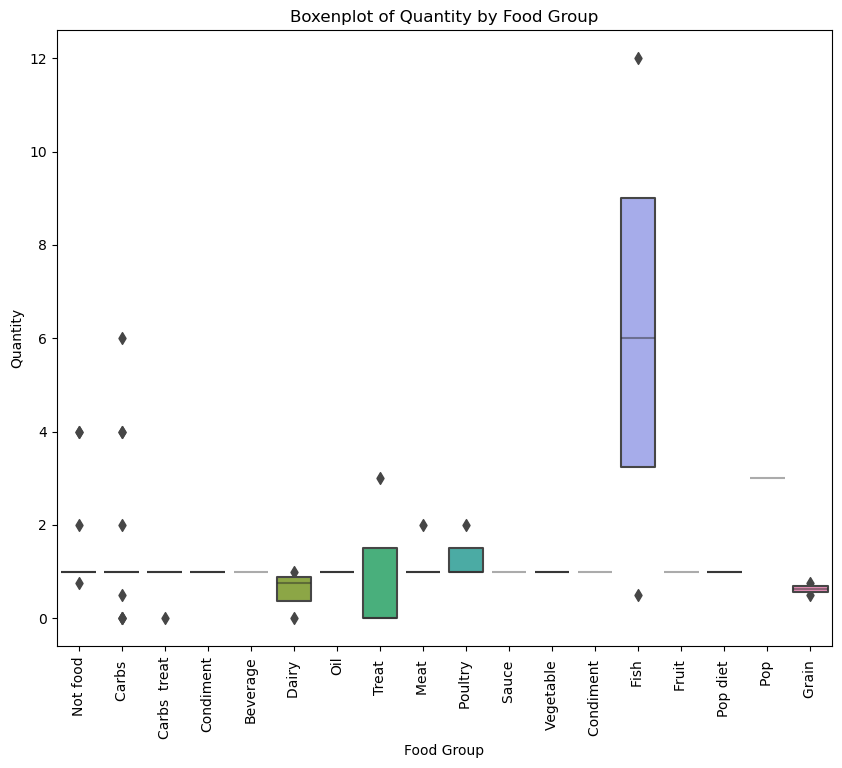

In [24]:
plt.figure(figsize=(10, 8))  # Increase the size of the plot
sns.boxenplot(x='Food_Group', y='quantity', data=df)
plt.xlabel('Food Group')  # Add x-label
plt.ylabel('Quantity')  # Add y-label
plt.xticks(rotation=90)  # Rotate x-labels by 90 degrees
plt.title('Boxenplot of Quantity by Food Group')  # Add title
plt.show()

In [ ]:
plt.ylabel('Food Group')  # Add y-label
plt.xlabel('Quantity')  # Add x-label

In [ ]:
plt.figure(figsize=(10, 8))  # Increase the size of the plot
sns.boxenplot(x='Food_Group', y='quantity', data=df)
plt.xlabel('Food Group')  # Add x-label
plt.ylabel('Quantity')  # Add y-label
plt.title('Boxenplot of Quantity by Food Group')  # Add title
plt.show()

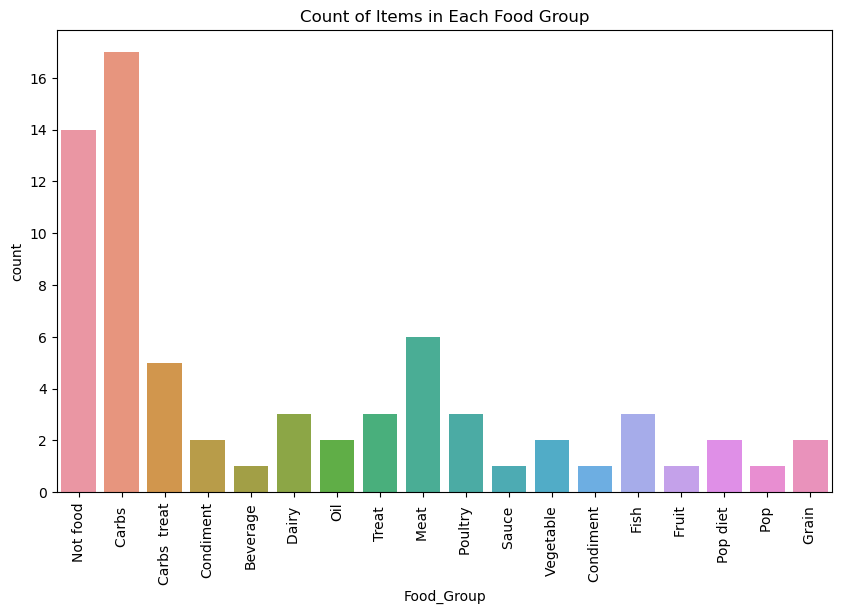

In [ ]:
# Bar Chart for Food Group Counts
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Food_Group')
plt.title('Count of Items in Each Food Group')
plt.xticks(rotation=90)
plt.show()

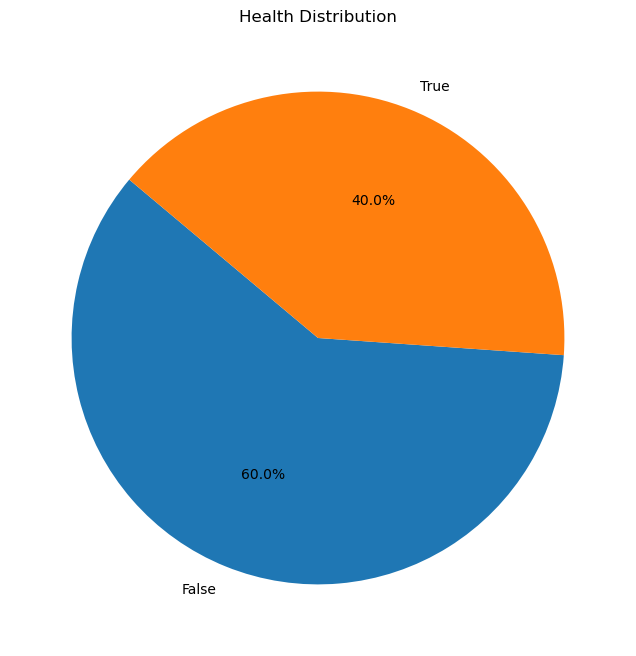

In [ ]:
# Pie Chart for Health Distribution
health_counts = df['Health'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(health_counts, labels=health_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Health Distribution')
plt.show()

C:\Users\Ryan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


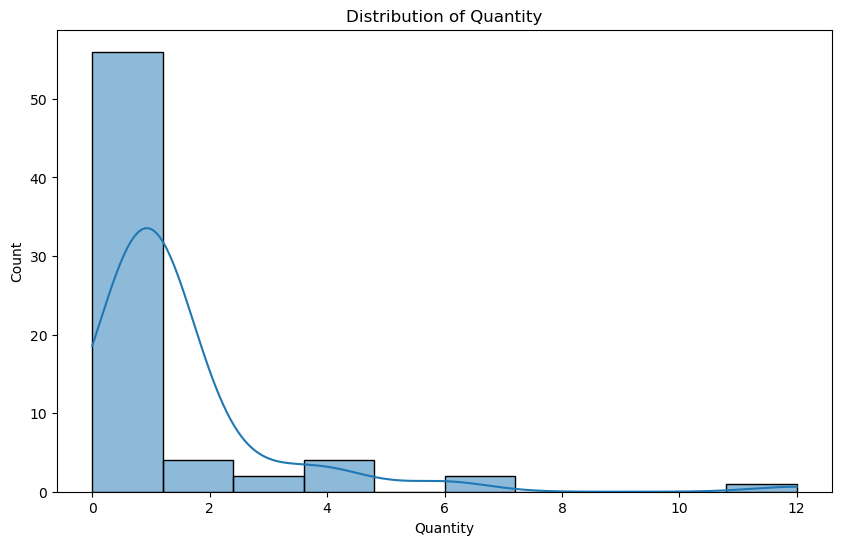

In [ ]:
# Histogram for Quantity Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='quantity', bins=10, kde=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.show()

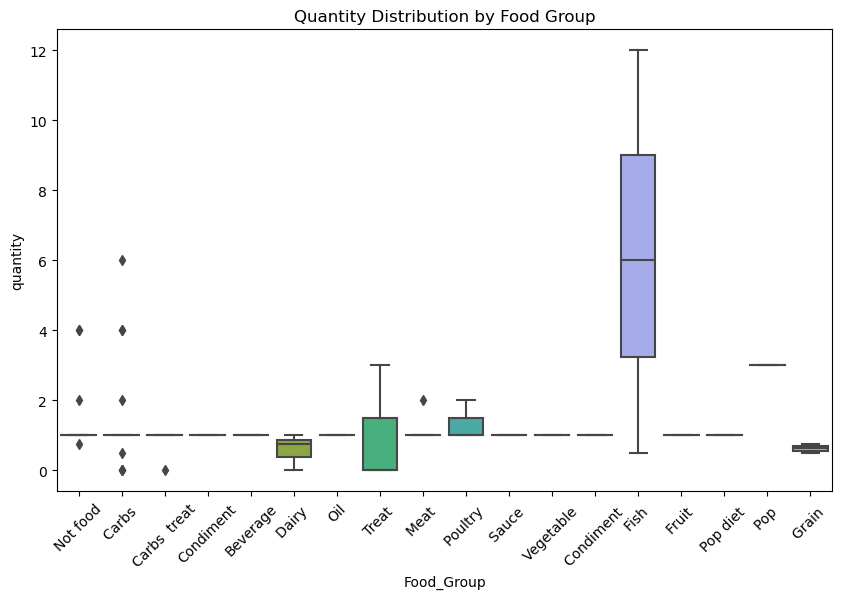

In [ ]:
# Box Plot for Quantity by Food Group
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Food_Group', y='quantity')
plt.title('Quantity Distribution by Food Group')
plt.xticks(rotation=45)
plt.show()

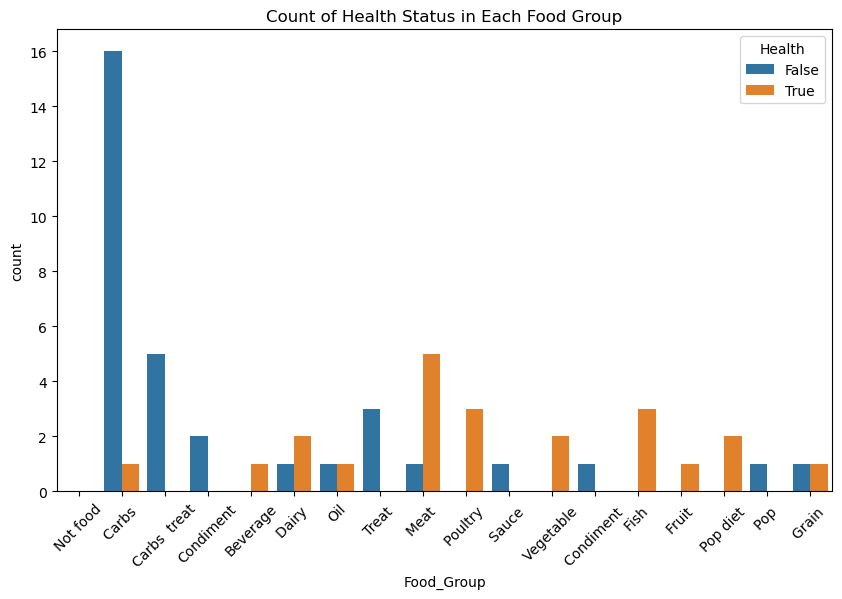

In [ ]:
# Count Plot for Each Food Group with Health Status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Food_Group', hue='Health')
plt.title('Count of Health Status in Each Food Group')
plt.xticks(rotation=45)
plt.show()

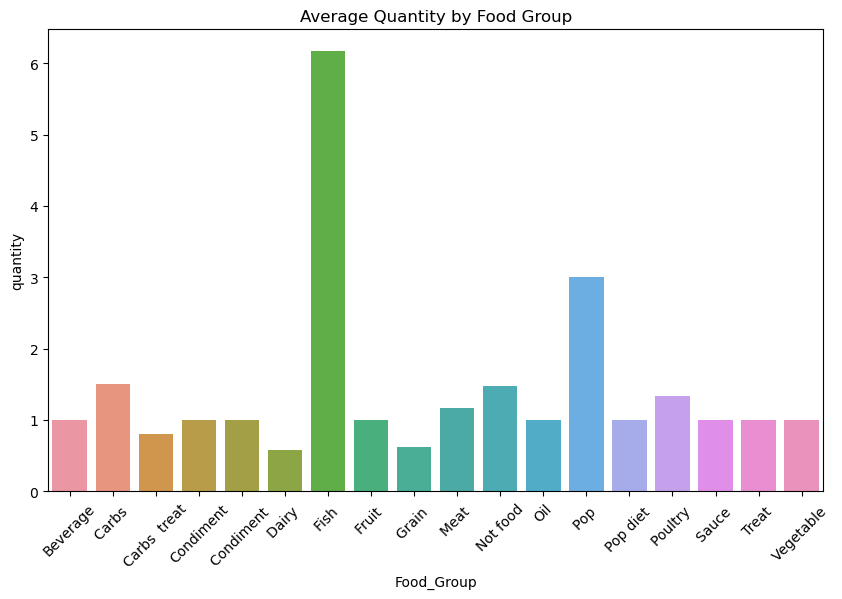

In [ ]:
# 1. Average Quantity by Food Group
avg_quantity = df.groupby('Food_Group')['quantity'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_quantity, x='Food_Group', y='quantity')
plt.title('Average Quantity by Food Group')
plt.xticks(rotation=45)
plt.show()

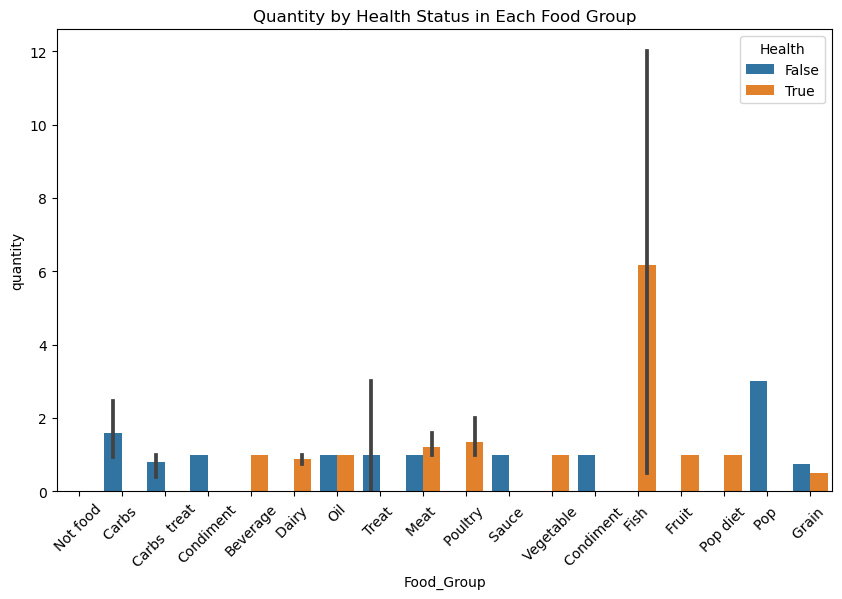

In [ ]:
# 2. Grouped Bar Chart of Quantity by Health Status
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Food_Group', y='quantity', hue='Health')
plt.title('Quantity by Health Status in Each Food Group')
plt.xticks(rotation=45)
plt.show()

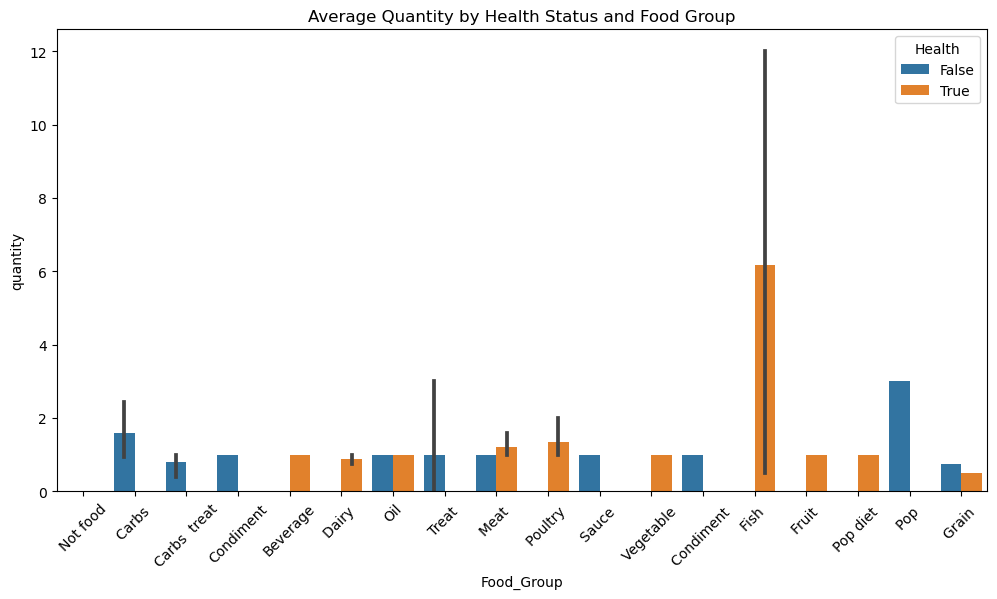

In [ ]:
# 2. Grouped Analysis of Quantity by Health and Food Group
plt.figure(figsize=(12, 6))
sns.barplot(x='Food_Group', y='quantity', hue='Health', data=df)
plt.title('Average Quantity by Health Status and Food Group')
plt.xticks(rotation=45)
plt.show()

C:\Users\Ryan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128031 (\N{FISH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ryan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127843 (\N{SUSHI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


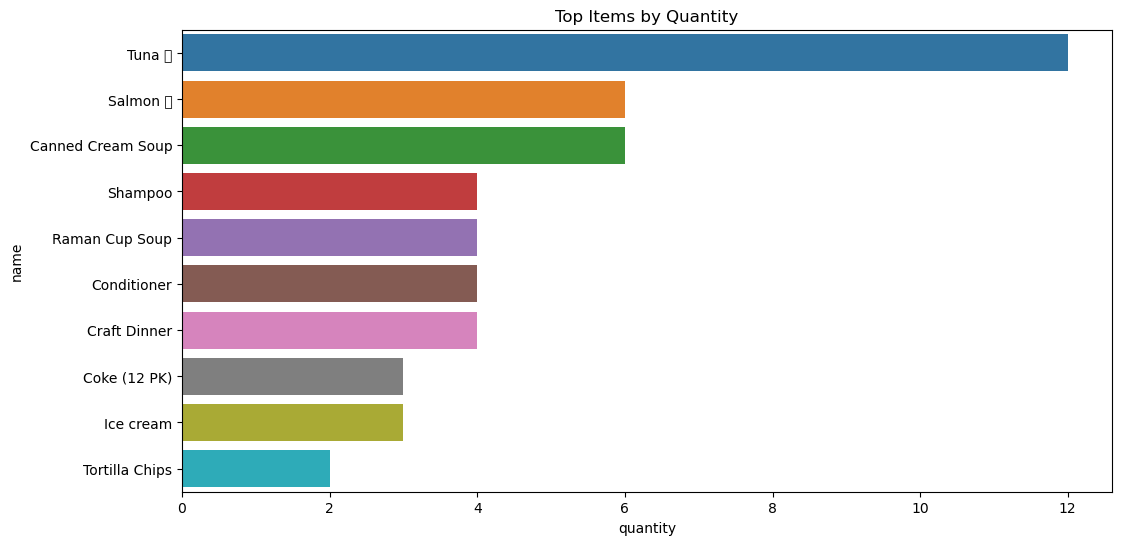

In [ ]:
# 3. Top Items by Quantity
top_items = df.sort_values(by='quantity', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='quantity', y='name', data=top_items)
plt.title('Top Items by Quantity')
plt.show()

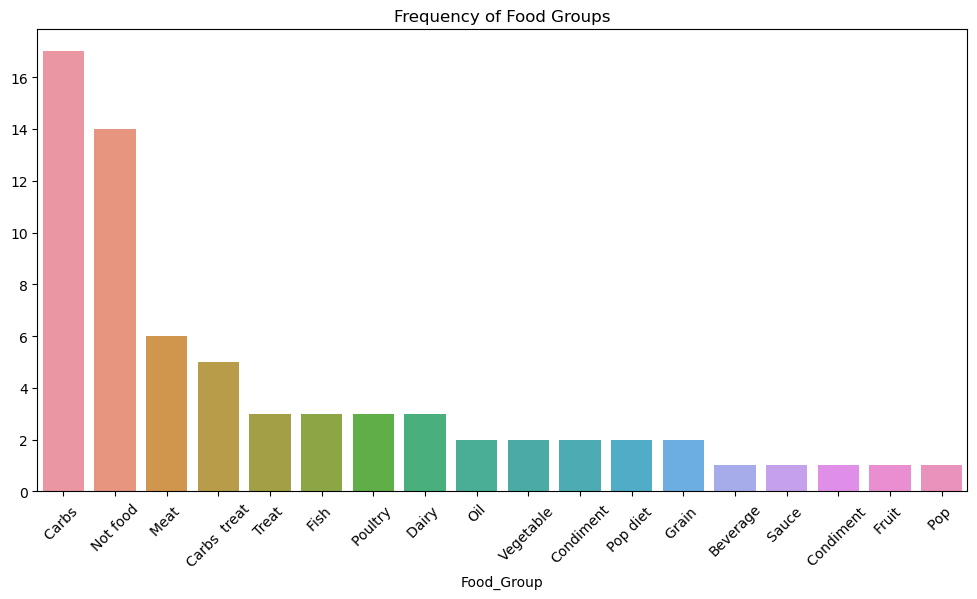

In [ ]:
# 4. Frequency of Food Groups
food_group_counts = df['Food_Group'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=food_group_counts.index, y=food_group_counts.values)
plt.title('Frequency of Food Groups')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.describe(include=['object'])


,name,Food_Group,Health
count,69,69,55
unique,69,18,2
top,Garbage Bags,Carbs,False
freq,1,17,33


In [ ]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"--- {col} ---")
    print(df[col].value_counts())
    print()


--- name ---
name
Garbage Bags           1
Raman Cup Soup         1
Dish Soap              1
Laundry Soap           1
Eggs DZ 🥚              1
                      ..
Whole Wheat Pasta 🌾    1
Granola Bars           1
Conditioner            1
Shampoo                1
Chicken Egg Rolls      1
Name: count, Length: 69, dtype: int64

--- Food_Group ---
Food_Group
Carbs           17
Not food        14
Meat             6
Carbs  treat     5
Treat            3
Fish             3
Poultry          3
Dairy            3
Oil              2
Vegetable        2
Condiment        2
Pop diet         2
Grain            2
Beverage         1
Sauce            1
Condiment        1
Fruit            1
Pop              1
Name: count, dtype: int64

--- Health ---
Health
False    33
True     22
Name: count, dtype: int64



In [ ]:
contingency_table = pd.crosstab(df['Food_Group'], df['Health'])

# Display the contingency table
print(contingency_table)

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-Square Statistic: {chi2}, P-value: {p}")

Health        False  True 
Food_Group                
Beverage          0      1
Carbs            16      1
Carbs  treat      5      0
Condiment         2      0
Condiment         1      0
Dairy             1      2
Fish              0      3
Fruit             0      1
Grain             1      1
Meat              1      5
Oil               1      1
Pop               1      0
Pop diet          0      2
Poultry           0      3
Sauce             1      0
Treat             3      0
Vegetable         0      2
Chi-Square Statistic: 40.661764705882355, P-value: 0.0006227901401338447


# 1. Quantity Distribution Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['quantity'], kde=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()